In [71]:
# The code was removed by Watson Studio for sharing.

# Going to begin creating our notebook.

We need current population numbers for the greater austin and metropolitan area. We also want to drop pins for the locations of Torchy's in the Austin area. We will examine the other venues in similar areas of Austin, to compare them to Seattle. Ideally we would want to see the number of mexican/taco shops in both neighborhoods. Lets also look at college populations between the two cities. 

Seattle Metro Pop (2019): 3,979,845
          
Austin Metro Pop (2019): 2,227,083

Due to college size and density (Austin Community College is a system of colleges throughout the austin area) we are going to be focusing on University of Washington (UW) and University of Texas (UT). Our neighborhoods will also focus on that area. There is one Torchy's location near University of Texas, so we can also use that as a focus point. 


| University Name | Est. # of Students |
| ----------- | ----------- |
| University of Texas  | 51,684        |
| Austin Community Colelge  | 41,500       |
| St. Edwards University  | 4,300        |
| Concordia University  | 2,565        |
| University of Washington      | 46,166 |
| North Seattle College   | 17,994        |
| Seattle Central College   | 16,814        |
| South Seattle College   | 6,849        | 

In [1]:
import numpy as np #first going to do our imports of libraries, and adjust them to work with our data
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm #for plotting
import matplotlib.colors as colors #for more plotting stuff
%matplotlib inline

!pip install folium
import folium
#print('Importing of libraries completed')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                           \                /                             failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='3_73_pypy|4_73_pypy|2_73_pypy|1_73_pypy|0_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> pytho

### It would be nice to use BeautifulSoup to import our tables, but sadly the layout on wikipedia for both Seattle and Austin isn't great. Ill add them all to a csv file, and then import it that way.


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
del austin['Unnamed: 0'] #we have an extra column, lets delete it from both
del seattle['Unnamed: 0']

In [4]:
seattle.head() #great, looks like we have our intial bits of data!

,Neighborhood,District,Latitude,Longitude
0,Broadview,North Seattle,47.720676,-122.368312
1,Bitter Lake,North Seattle,47.730000,-122.351000
2,North Beach,North Seattle,47.695931,-122.391519
3,Blue Ridge,North Seattle,47.702888,-122.378440
4,Crown Hill,North Seattle,47.695668,-122.372253


### Okay, got our initial bit of neighboorhood data. Lets construct our maps and clusters, and get venue location for both cities. We are ideally wanting to focus on restaurants only in the neighborhoods, to show the need for a new taco shop. 

In [5]:
CLIENT_ID = 'MF0R3O1GJJPW5DUXAMHXDPFSBBM2VOQBP1PZTL4DHMONWSON' # your Foursquare ID
CLIENT_SECRET = 'SV15I4HDQZGYDWAHNFBDHEZGSBRGPZWQDT1NW5LJAQKJYCBJ' # your Foursquare Secret #Code 1XJ1DZZPAOU0IFH3SIANOZM1N4OFBLIFRDA34RIIZDU0U2J0#_=_
ACCESS_TOKEN = 'ABOV350IQRLQXOFDFIJ1GEJ32XMMM0X1KOTKKIN01UJIZ1L4' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100

In [6]:
#lets get our maps for Seattle and Austin
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="sea_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

address2 = 'Austin, TX'

geolocator2 = Nominatim(user_agent="aus_explorer")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Austin are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.
The geograpical coordinate of Austin are 30.2711286, -97.7436995.


In [7]:
# Seattle Map
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, district, neighborhood in zip(seattle['Latitude'], seattle['Longitude'], seattle['District'], seattle['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [8]:
# Austin Map
map_austin = folium.Map(location=[latitude2, longitude2], zoom_start=10)

for lat2, lng2, district2, neighborhood2 in zip(austin['Latitude'], austin['Longitude'], austin['District'], austin['Neighborhood']):
    label = '{}, {}'.format(neighborhood2, district2)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat2, lng2],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_austin)  
    

folium.Marker([30.293730, -97.741722], popup='<i>Torchys nearest UT</i>', tooltip='Torchys Tacos').add_to(map_austin)

map_austin

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): #funciton for getting our venues for both locations
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
seattle_venues = getNearbyVenues(names=seattle['Neighborhood'], #getting our venues associated with neighborhoods
                                   latitudes=seattle['Latitude'],
                                   longitudes=seattle['Longitude']
                                  )
print(seattle_venues.shape)
seattle_venues.head()

Broadview
Bitter Lake
North Beach 
Blue Ridge
Crown Hill
Greenwood
Northgate
Haller Lake
Pinehurst
North College Park / Lichton Springs
Maple Leaf
Lake City
Cedar Park
Matthews Beach
Meadowbrook
Olympic Hills
Victory Heights
Wedgwood
View Ridge
Sand Point
Roosevelt
Ravenna
Bryant
Windermere
Hawthorne Hills
Laurelhurst
University District
University Village
Wallingford
North Lake
Green Lake
Fremont
Phinney Ridge
Ballard
West Woodland
Whittier Heights
Adams
Sunset Hill
Loyal Heights
Magnolia
Lawton Park
Briarcliff
Interbay
Queen Anne
Lower Queen Anne
Capitol Hill
Portage Bay
Roanoke
Broadway
Montlake
Stevens
Interlaken
Madison Valley
Renton Hill
Madison Park
Broadmoor
Lake Union
South Lake Union, Seattle
Cascade, Seattle
Westlake
Eastlake
Downtown
Denny Triangle
Belltown
Pike-Market
Central Business District
First Hill
Pioneer Square
International District
Yesler Terrace
Central Waterfront
Central Area / Central District
Mann
Cherry Hill
Squire Park
Atlantic
Madrona
Harrison / Denny-Blai

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Broadview,47.720676,-122.368312,Amato Catering,47.719408,-122.369465,Food
1,Broadview,47.720676,-122.368312,Editors Pick,47.718020,-122.367344,IT Services
2,Broadview,47.720676,-122.368312,Carkeek park walking trails,47.723485,-122.369717,Trail
3,Broadview,47.720676,-122.368312,Fractal Renovations,47.718190,-122.372789,Construction & Landscaping
4,Broadview,47.720676,-122.368312,Weltens Jozef,47.723507,-122.373095,Pizza Place


In [11]:
austin_venues = getNearbyVenues(names=austin['Neighborhood'], #and for austin
                                   latitudes=austin['Latitude'],
                                   longitudes=austin['Longitude']
                                  )
print(austin_venues.shape)
austin_venues.head()

Old Pecan Street
Downtown Austin
West Downtown
Clarksville Historic District
Judge's Hill
Old Enfield
Eastwoods
Original West University
Lower Waller Creek
Pemberton Heights
Old West Austin
Hancock
Shoal Crest
North University
Shadow Lawn Historic District
Heritage
Bryker Woods
Hyde Park
Caswell Heights
Oakmont Heights
Ridgelea
Rosedale
Ridgetop
East Congress
East End
Govalle
Holly
East Cesar Chavez
Central East Austin
French Place
Mueller
Gracy Woods
Steiner Ranch
Copperfield
Wells Branch
Battle Bend Springs
Hancock
North Loop
North Campus
Saint John
Highland
Brentwood
Allandale
Crestview
Wooten
North Shoal Creek
North Lamar
North Burnet
Balcones Woods
Barrington Oaks
Estates of Brentwood
Windsor Park
Windsor Hills
Northwest Hills
Great Hills/Arboretum
Canyon Creek
Dawson
Travis Heights
Bouldin Creek
South Congress
Zilker
Barton Hills
South River City
Spyglass-Barton's Bluffs
Barton Creek
Galindo
South Lamar
Onion Creek
Southpark Meadows
Dove Springs
Southeast Austin
South Manchaca
Ea

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old Pecan Street,30.267068,-97.739335,Alamo Drafthouse Cinema,30.267460,-97.739550,Movie Theater
1,Old Pecan Street,30.267068,-97.739335,Eddie V's Prime Seafood,30.266339,-97.740504,Seafood Restaurant
2,Old Pecan Street,30.267068,-97.739335,Antone's,30.266242,-97.740380,Nightclub
3,Old Pecan Street,30.267068,-97.739335,Esther's Follies,30.266413,-97.737373,Comedy Club
4,Old Pecan Street,30.267068,-97.739335,Firehouse Hostel and Lounge,30.268096,-97.741283,Lounge


In [119]:
#Seattle venue limits to 3 nearest neighborhoods and only food places. Have to do some manual sorting for this
seattle_venues1 = seattle_venues1[~seattle_venues1["Venue Category"].str.contains("Golf Driving Range")]
seattle_venues1 = seattle_venues[seattle_venues['Neighborhood'].isin(['Laurelhurst', 'University District', 'University Village'])]# this is for going down to the 3 closest


seattle_venues1.reset_index(inplace=True)
del seattle_venues1['index']
seattle_venues1.head(100)
#seattle_venues1.shape #51 places in the neighborhoods near UW where students and residents can easily get food. There is only one mexican restaurant, and one food truck in the area

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Laurelhurst,47.660278,-122.280000,Starbucks,47.662210,-122.283920,Coffee Shop
1,Laurelhurst,47.660278,-122.280000,Children's Ocean Cafe,47.662564,-122.280780,Café
2,Laurelhurst,47.660278,-122.280000,Emerald City Smoothie,47.657875,-122.284161,Juice Bar
3,University District,47.655000,-122.303333,Husky Tailgate,47.657267,-122.300778,Beer Garden
4,University District,47.655000,-122.303333,UW: Reboot Café,47.653456,-122.305640,Coffee Shop
5,University District,47.655000,-122.303333,Subway,47.655462,-122.305426,Sandwich Place
6,University District,47.655000,-122.303333,Motosurf,47.655891,-122.309290,Food Truck
7,University District,47.655000,-122.303333,Starbucks,47.654852,-122.305444,Coffee Shop
8,University District,47.655000,-122.303333,Dub Street Burgers,47.654861,-122.305253,Burger Joint
9,University District,47.655000,-122.303333,IMA:Freshens,47.653479,-122.301714,Juice Bar


In [101]:
#Austin venue limits to 3 nearest neighborhoods and only food places
austin_venues1 = austin_venues[austin_venues['Neighborhood'].isin(['Shoal Crest', 'North University', 'Original West University'])]# this is for going down to the 3 closest
austin_venues1 = austin_venues1[~austin_venues1["Venue Category"].str.contains("Playground")]
austin_venues1.reset_index(inplace=True)
del austin_venues1['index']
austin_venues1.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Original West University,30.291221,-97.741532,Kerbey Lane Café,30.291220,-97.741500,Café
1,Original West University,30.291221,-97.741532,The Halal Bros,30.292539,-97.741674,Middle Eastern Restaurant
2,Original West University,30.291221,-97.741532,Hole In The Wall,30.289973,-97.741480,Rock Club
3,Original West University,30.291221,-97.741532,Torchy's Tacos,30.293710,-97.741728,Taco Place
4,Original West University,30.291221,-97.741532,Kasbah Moroccan Lounge,30.292658,-97.741547,Hookah Bar
5,Original West University,30.291221,-97.741532,Fricano's Deli & Catering,30.288092,-97.742982,Sandwich Place
6,Original West University,30.291221,-97.741532,Madam Mam's,30.290618,-97.742520,Thai Restaurant
7,Original West University,30.291221,-97.741532,CAVA,30.288562,-97.741684,Mediterranean Restaurant
8,Original West University,30.291221,-97.741532,Space24Twenty @ UO,30.288269,-97.742071,Food Court
9,Original West University,30.291221,-97.741532,The Pizza Press,30.290702,-97.742043,Pizza Place


In [ ]:
project.save_data(data=austin_venues1.to_csv(index=False),file_name='AustinRestaurants.csv',overwrite=True) #exported our dataframes just in case we need them
print("exported")

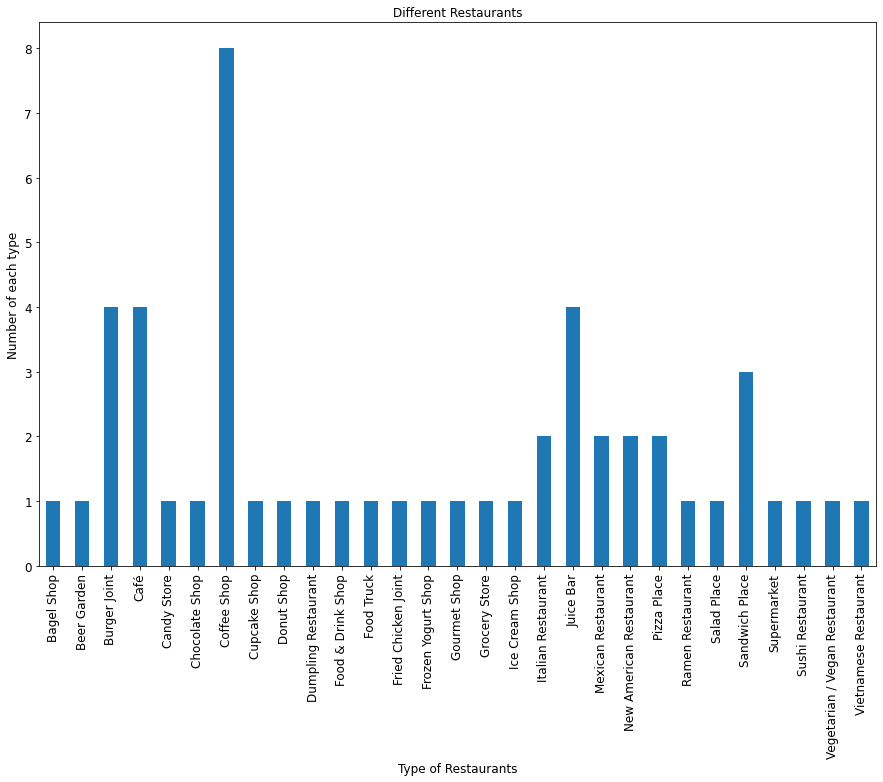

In [117]:
import matplotlib.pyplot as plt
seattle_venues2 = seattle_venues1.groupby(["Venue Category"]).count() #making a new dataframe for charting
seattle_venues2.head(100)
sea_food = seattle_venues2[['Neighborhood']].plot(kind='bar', title ="Different Restaurants", figsize=(15, 10), legend=False, fontsize=12)
sea_food.set_xlabel("Type of Restaurants", fontsize=12)
sea_food.set_ylabel("Number of each type", fontsize=12)
plt.show()

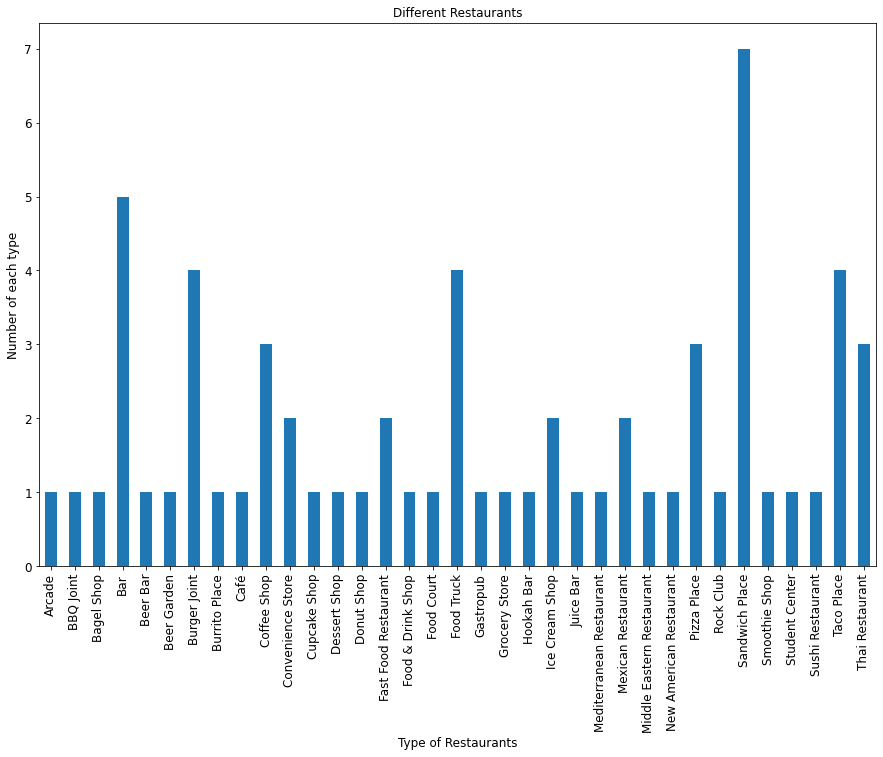

In [118]:
austin_venues2 = austin_venues1.groupby(["Venue Category"]).count() #and our austin chart
aus_food = austin_venues2[['Neighborhood']].plot(kind='bar', title ="Different Restaurants", figsize=(15, 10), legend=False, fontsize=12)
aus_food.set_xlabel("Type of Restaurants", fontsize=12)
aus_food.set_ylabel("Number of each type", fontsize=12)
plt.show()

Looking at our dataframes, we can see that between the three closest neighborhoods to University of Washington and the three closest to University of Texas, that there is much fewer mexican/taco places near the University of Washington than at the University of Texas. This leaves a big market opportunity for the torchy's corporation to establish a restaurant presence. 